# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import  warnings
warnings.filterwarnings(action='ignore')

# Reading Data

In [ ]:
df=pd.read_csv('poco_data.csv')
df.head()

,Ratings,Review
0,5,Awesome classy phone everything is good ...val...
1,5,Im having a great experience with this better ...
2,5,Poco has made its hard phone camera quality is...
3,5,"Camera is not as great as poco x3 pro, but it ..."
4,4,Received the phone today. Thanks to Flipkart w...


# Basic Operations,EDA,Visualization

In [ ]:
df.tail()

,Ratings,Review
136,5,Best 5g phone in the segment.READ MORE
137,5,This flipkart packaging Is nice and tere is no...
138,3,Phone is good but within a month my charger st...
139,3,"Camera is not good, mainly selfie cam is rubbi..."
140,5,Camera... 4starDisplay quality. ExcellentBatte...


In [ ]:
df.shape

(141, 2)

In [ ]:
df.dtypes

Ratings     int64
Review     object
dtype: object

In [ ]:
df.describe()

,Ratings
count,141.000000
mean,4.290780
std,0.797666
min,3.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ratings  141 non-null    int64 
 1   Review   141 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [ ]:
df.columns

Index(['Ratings', 'Review'], dtype='object')

In [ ]:
df.sample()

,Ratings,Review
83,4,Rear camera is not good makes pictures warm se...


In [ ]:
df.isnull().sum()

Ratings    0
Review     0
dtype: int64

In [ ]:
len(df)

141

In [ ]:
df.nunique()

Ratings      3
Review     122
dtype: int64

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.isnull().mean()*100

Ratings    0.0
Review     0.0
dtype: float64

In [ ]:
df['Review'][50]

"Poco x4 pro battery is good, and it's display is good, and the camera is fineREAD MORE"

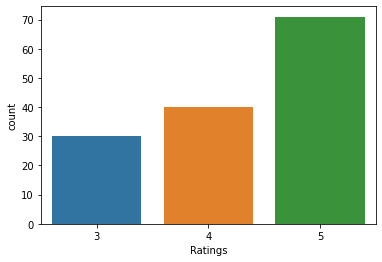

In [ ]:
_=sns.countplot(x='Ratings',data=df)

In [ ]:
df['Ratings'].unique()

array([5, 4, 3], dtype=int64)

In [ ]:
df['Ratings'].value_counts()

5    71
4    40
3    30
Name: Ratings, dtype: int64

In [ ]:
df.groupby('Ratings').count()

,Review
Ratings,
3,30
4,40
5,71


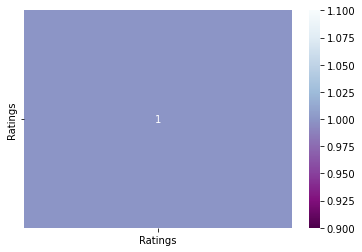

In [ ]:
_=sns.heatmap(df.corr(),annot=True,cmap='BuPu_r')

Text(0.5, 1.0, 'Ratings Pie Plot')

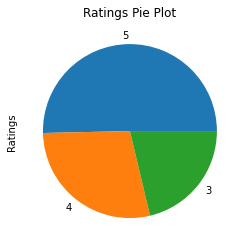

In [ ]:
df['Ratings'].value_counts().plot.pie()
plt.title('Ratings Pie Plot')

In [ ]:
df['Ratings'].max()

5

In [ ]:
df['Ratings'].min()

3

In [ ]:
df['Ratings'].mean()

4.290780141843972

In [ ]:
df['Ratings'].sum()

605

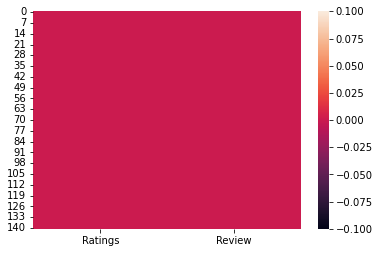

In [ ]:
_=sns.heatmap(df.isnull())

In [ ]:
df.sort_values(by='Ratings')

,Ratings,Review
70,3,Nyc phone I bought for my dadREAD MORE
75,3,Phone looks premium. Display could have been b...
20,3,Released with less specification than expected...
129,3,Front camera worst forfamance.Photos shade out...
22,3,Display is looking good Battery backup is avar...
...,...,...
57,5,"Amazing smartphone in this range, just bought ..."
56,5,Good performance.READ MORE
54,5,Everything is good. Camera performance can be ...
67,5,Nice productREAD MORE


In [ ]:
df['Review']=df['Review'].str.replace('READ MORE','')

In [ ]:
df.head()

,Ratings,Review
0,5,Awesome classy phone everything is good ...val...
1,5,Im having a great experience with this better ...
2,5,Poco has made its hard phone camera quality is...
3,5,"Camera is not as great as poco x3 pro, but it ..."
4,4,Received the phone today. Thanks to Flipkart w...


In [ ]:
df['Rating']=df['Ratings'].replace(to_replace={5:'positive',4:'positive',3:'negative'})

In [ ]:
df.head()

,Ratings,Review,Rating
0,5,Awesome classy phone everything is good ...val...,positive
1,5,Im having a great experience with this better ...,positive
2,5,Poco has made its hard phone camera quality is...,positive
3,5,"Camera is not as great as poco x3 pro, but it ...",positive
4,4,Received the phone today. Thanks to Flipkart w...,positive


In [ ]:
df.drop('Ratings',axis=1,inplace=True)

In [ ]:
df.head()

,Review,Rating
0,Awesome classy phone everything is good ...val...,positive
1,Im having a great experience with this better ...,positive
2,Poco has made its hard phone camera quality is...,positive
3,"Camera is not as great as poco x3 pro, but it ...",positive
4,Received the phone today. Thanks to Flipkart w...,positive


In [ ]:
df['Rating'].value_counts(normalize=True)

positive    0.787234
negative    0.212766
Name: Rating, dtype: float64

# NLP

# Importing libraries

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...


True

In [ ]:
import re
from nltk.corpus import stopwords as sw
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
print(sw.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
print(len(sw.words('english')))

179


# Pre-Processing Steps

In [ ]:
wd=WordNetLemmatizer()
corpus=[]
for i in range(len(df)):
    review=re.sub('[^a-zA-Z]',' ',df['Review'][i])
    review=review.lower()
    review=review.split()
    review=[wd.lemmatize(word) for word in review if not word in sw.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [ ]:
corpus

['awesome classy phone everything good value money camera need improve update',
 'im great experience better charging progress long life battery amazing camera performance personally loved mobile phone also best gaming experience hope u also like phone poco x pro g',
 'poco made hard phone camera quality awesome yellow color phone super shinning back played bmi game worked well charging ccharges minute awesome price buy dual stereo speaker hearing music watching movie super',
 'camera great poco x pro great selfie cam awesome battery good charge super fast great buy',
 'received phone today thanks flipkart super fast delivery ordered yellow colour mom appeared classy inside box phone adaptor case original bill well two thing say yes handset actually look good eye feel premium hand battery good could see phone charging within minute used phone throughout day still camera decent enough make cap',
 'although alrounder g phone spec camera quality satisfied even decent mp sensor peromance s

# Word Embedding
# Count Vectorizer

In [ ]:
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()

In [ ]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
y=df['Rating'].iloc[:].values

In [ ]:
y

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'positive', 'negative', 'positive',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positi

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print('#####################')
print(x_test.shape)
print(y_test.shape)

(112, 598)
(112,)
#####################
(29, 598)
(29,)


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rt= RandomForestClassifier()
rt.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_prdr = rt.predict(x_test)

In [ ]:
print('Training Score:',100*rt.score(x_train,y_train))
print('Testing Score :',100*rt.score(x_test,y_test))

Training Score: 99.10714285714286
Testing Score : 75.86206896551724


In [ ]:
from sklearn.metrics import accuracy_score
# accuracy_train = accuracy_score(x_train,y_train)
# print('Training accuracy',accuracy_train)
accuracy_test = accuracy_score(y_test, y_prdr)
print('Testing accuracy',accuracy_test)

Testing accuracy 0.7586206896551724


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
print('Confusion Matrix:\n ' + str(confusion_matrix(y_prdr,y_test)))
print('_________________________')
print('Classification Report:\n ' + str(classification_report(y_prdr,y_test)))

Confusion Matrix:
 [[ 0  0]
 [ 7 22]]
_________________________
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         0
    positive       1.00      0.76      0.86        29

    accuracy                           0.76        29
   macro avg       0.50      0.38      0.43        29
weighted avg       1.00      0.76      0.86        29



# Model Building

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [ ]:
model_gnb=GaussianNB()
model_gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_prdg = model_gnb.predict(x_test)

In [ ]:
print('Training Score:',100*model_gnb.score(x_train,y_train))
print('Testing Score :',100*model_gnb.score(x_test,y_test))

Training Score: 86.60714285714286
Testing Score : 62.06896551724138


In [ ]:
from sklearn.metrics import accuracy_score
# accuracy_train = accuracy_score(x_train,y_train)
# print('Training accuracy',accuracy_train)
accuracy_test = accuracy_score(y_test, y_prdg)
print('Testing accuracy',accuracy_test)

Testing accuracy 0.6206896551724138


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
print('Confusion Matrix:\n ' + str(confusion_matrix(y_prdg,y_test)))
print('_________________________')
print('Classification Report:\n ' + str(classification_report(y_prdg,y_test)))

Confusion Matrix:
 [[ 3  7]
 [ 4 15]]
_________________________
Classification Report:
               precision    recall  f1-score   support

    negative       0.43      0.30      0.35        10
    positive       0.68      0.79      0.73        19

    accuracy                           0.62        29
   macro avg       0.56      0.54      0.54        29
weighted avg       0.59      0.62      0.60        29



In [ ]:
model_mnb=MultinomialNB()
model_mnb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_prdm= model_mnb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
# accuracy_train = accuracy_score(x_train,y_train)
# print('Training accuracy',accuracy_train)
accuracy_test = accuracy_score(y_test, y_prdm)
print('Testing accuracy',accuracy_test)

Testing accuracy 0.7241379310344828


In [ ]:
print('Training Score:',100*model_mnb.score(x_train,y_train))
print('Testing Score :',100*model_mnb.score(x_test,y_test))

Training Score: 92.85714285714286
Testing Score : 72.41379310344827


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
print('Confusion Matrix:\n ' + str(confusion_matrix(y_prdm,y_test)))
print('_________________________')
print('Classification Report:\n ' + str(classification_report(y_prdm,y_test)))

Confusion Matrix:
 [[ 1  2]
 [ 6 20]]
_________________________
Classification Report:
               precision    recall  f1-score   support

    negative       0.14      0.33      0.20         3
    positive       0.91      0.77      0.83        26

    accuracy                           0.72        29
   macro avg       0.53      0.55      0.52        29
weighted avg       0.83      0.72      0.77        29

